# Bài 1: Tính và phân tích ACF/PACF



### Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### Read file 

In [2]:
df = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


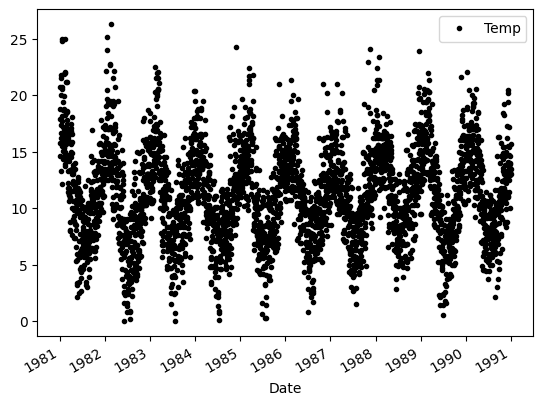

In [4]:
df.plot(style='k.')
plt.show()

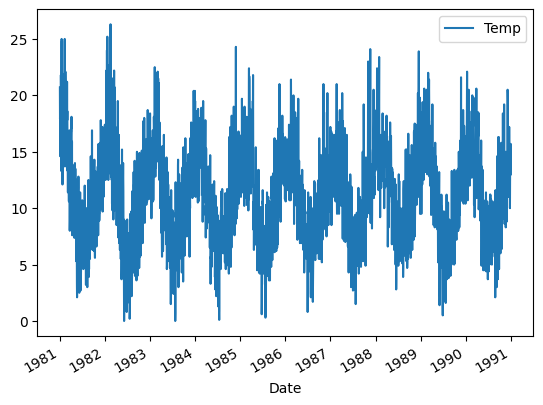

In [5]:
df.plot()
plt.show()

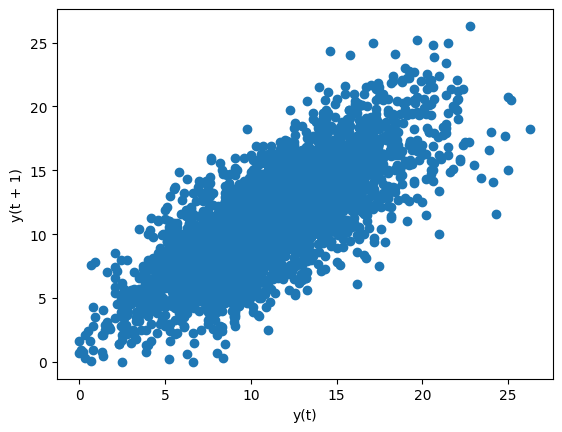

In [6]:
from pandas.plotting import lag_plot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True,)
lag_plot(series)
plt.show()

### Độ trễ (Lag) là khoảng thời gian (số bước) giữa hai điểm dữ liệu được so sánh.

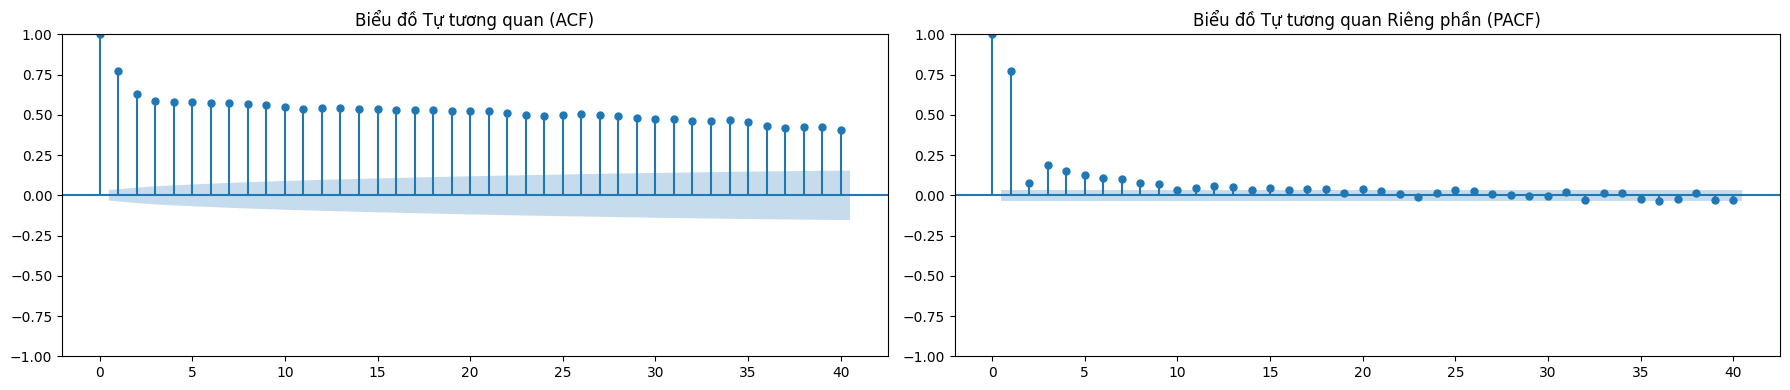

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

plot_acf(df, lags=40, ax=ax[0])
ax[0].set_title('Biểu đồ Tự tương quan (ACF)')
plot_pacf(df, lags=40,ax=ax[1])
ax[1].set_title('Biểu đồ Tự tương quan Riêng phần (PACF)')
plt.tight_layout()
plt.show()



### KẾT LUẬN (dựa trên ACF & PACF)

Chuỗi có tự tương quan mạnh không?
- Có. ACF có giá trị dương lớn và giảm rất chậm theo độ trễ, nhiều lag vượt khoảng tin cậy → chuỗi có tự tương quan mạnh, không phải white noise.

Có xu hướng/mùa vụ thể hiện qua ACF/PACF không?

- Có xu hướng (trend): ACF giảm chậm và kéo dài, PACF không cắt gọn ngay → chuỗi nhiều khả năng chưa dừng và có xu hướng.

- Không thấy mùa vụ rõ ràng: ACF/PACF không xuất hiện các đỉnh lặp lại tại các lag cố định (như 12, 24, …).

Lag nào quan trọng nhất?
- Lag 1 là quan trọng nhất (PACF tại lag 1 rất lớn và vượt ngưỡng tin cậy). Các lag tiếp theo (khoảng 2–5) có ảnh hưởng yếu dần; sau đó không còn ý nghĩa thống kê rõ ràng.

# Bài 2: Kiểm tra White Noise

In [8]:
# Sinh dữ liệu white noise bằng numpy(1000 điểm)
np.random.seed(42)
white_noise = np.random.normal(loc=0, scale=1, size=1000)
wn_series = pd.Series(white_noise)

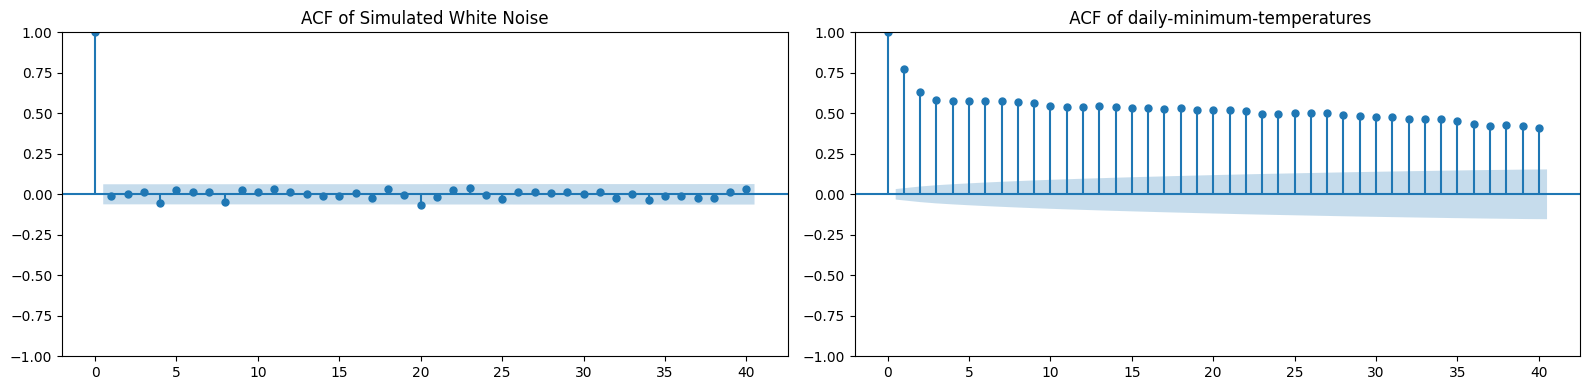

In [40]:
# Vẽ ACF cuủa WhiteNoise (kiểm tra 40 lags)
fig, ax = plt.subplots(1,2, figsize=(16,4))
plot_acf(wn_series, lags=40, title="ACF of Simulated White Noise", ax=ax[0])

# ACF của chuỗi daily-minimum-temperatures
plot_acf(df, lags=40, title=" ACF of daily-minimum-temperatures", ax=ax[1])

plt.tight_layout()
plt.show()


### So sánh ACF của White Noise và Daily-Minimum-Temperatures

1. White noise có ACF dao động quanh 0 và hầu hết các lag (ngoài lag 0) nằm trong ngưỡng tin cậy 95%, cho thấy không tồn tại tự tương quan.

2. ACF của daily-minimum-temperatures có giá trị dương lớn ở nhiều lag và giảm rất chậm, nhiều lag vượt ngưỡng tin cậy → tự tương quan mạnh.

3. Chuỗi nhiệt độ thể hiện tính phụ thuộc theo thời gian, nghĩa là giá trị hiện tại chịu ảnh hưởng rõ rệt từ các giá trị trước đó, trong khi white noise thì không.

4. Dạng suy giảm chậm của ACF ở chuỗi nhiệt độ cho thấy có xu hướng hoặc cấu trúc dài hạn, còn white noise không có cấu trúc.

5. Kết luận: White noise là chuỗi ngẫu nhiên thuần, trong khi daily-minimum-temperatures không phải white noise và cần mô hình hóa bằng các mô hình chuỗi thời gian 

# Bài tập 3: Phân rã chuỗi thời gian (Decomposition)

In [10]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [11]:
# Resample dữ liệu theo tháng, lấy giá trị trung bình (Monthly Average)
# 'MS' (Month Start)

df_monthly = df["Temp"].resample('MS').mean() # MS = Month Start
df_monthly.name = "Temp_Monthly_Avg"

print("5 giá trị đầu của Chuỗi dữ liệu theo tháng (Không đổi tên)")
print(df_monthly.head().to_markdown(numalign="left", stralign="left"))

5 giá trị đầu của Chuỗi dữ liệu theo tháng (Không đổi tên)
| Date                | Temp_Monthly_Avg   |
|:--------------------|:-------------------|
| 1981-01-01 00:00:00 | 17.7129            |
| 1981-02-01 00:00:00 | 17.6786            |
| 1981-03-01 00:00:00 | 13.5               |
| 1981-04-01 00:00:00 | 12.3567            |
| 1981-05-01 00:00:00 | 9.49032            |


### So sánh giữ STL và classical decomposition
STL được sử dụng thay vì classical decomposition vì STL cho phép thành phần mùa vụ thay đổi linh hoạt theo thời gian, trong khi classical decomposition giả định mùa vụ cố định. Ngoài ra, STL ít nhạy cảm với nhiễu và các điểm ngoại lai, giúp tách xu hướng và mùa vụ ổn định hơn. Do đó, STL phù hợp hơn với dữ liệu nhiệt độ thực tế, vốn có tính biến động và đặc điểm mùa vụ không hoàn toàn cố định theo thời gian.

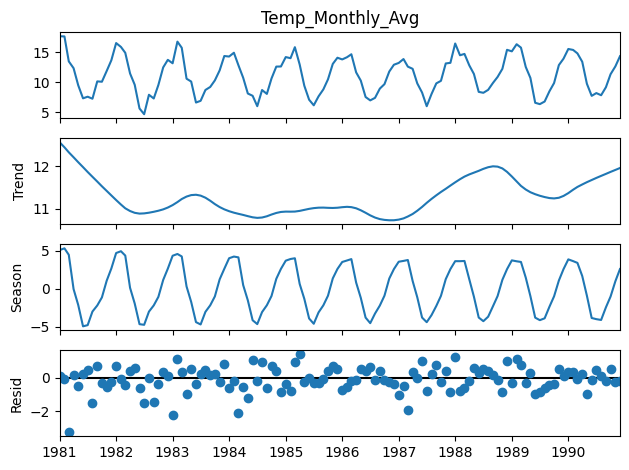

In [12]:
# Phương pháp : STL Decomposition (Seasonal-Trend using Loess)
# STL là phương pháp hiện đại, mạnh mẽ và xử lý nhiễu tốt hơn

period_stl = 13 # Chu kỳ mùa vụ theo tháng là 12, dùng cửa sổ lẻ 13 
decomposition_stl = STL(df_monthly, seasonal = period_stl, robust = True).fit() # Thực hiện STL decomposition

# Vẽ 4 thành phần: Observed, Trend, Seasonal, Residual
decomposition_stl.plot()
plt.tight_layout()
plt.show()


### Xu hướng tăng/giảm?
- Đường Xu hướng (Trend) cho thấy xu hướng tổng thể của nhiệt độ tối thiểu trung bình hàng tháng là khá ổn định trong suốt giai đoạn $10$ năm.Có thể nhận thấy xu hướng giảm nhẹ trong vài năm đầu, sau đó ổn định hoặc có xu hướng tăng nhẹ trở lại về cuối chuỗi. Xu hướng dài hạn không tăng/giảm mạnh mẽ.
### Mùa vụ mạnh hay yếu?
- Thành phần mùa vụ thể hiện rất rõ ràng và ổn định, với biên độ lớn và lặp lại đều theo chu kỳ 12 tháng. Điều này cho thấy mùa vụ mạnh, phản ánh tính chất thời tiết theo năm.
### Residual có giống white noise không?
- Phần Residual (Nhiễu) dao động ngẫu nhiên xung quanh $0$ và không thể hiện bất kỳ cấu trúc hay mẫu hình nào.Điều này cho thấy Residual giống White Noise. Ý nghĩa là mô hình phân rã STL đã thành công trong việc tách biệt tất cả các cấu trúc (Trend và Seasonality) khỏi chuỗi, và phần còn lại là nhiễu ngẫu nhiên không thể dự đoán được.

### Kết luận chung
- Chuỗi nhiệt độ trung bình theo tháng bao gồm xu hướng dài hạn nhẹ, mùa vụ mạnh và ổn định, và phần dư gần white noise, cho thấy việc phân rã là hợp lý và đã tách được các cấu trúc chính của chuỗi.

# Bài tập 4: Kiểm tra và xử lý chất lượng dữ liệu

In [13]:
df.rename(columns={'Temp': 'Tmin'}, inplace=True)
df_series = df['Tmin'].copy() # Sử dụng Series gốc

# Tạo và Kiểm tra Missing Values
df_test = df_series.copy()
np.random.seed(42)

# Tạo random 100 giá trị thiếu 
missing = np.random.choice(df_test.index, size=100, replace=False)
df_test.loc[missing] = np.nan

print(f"Tổng dữ liệu thiếu: {df_test.isnull().sum()}")
print(df_test.loc[missing].head().to_markdown(numalign="left", stralign="left"))

Tổng dữ liệu thiếu: 100
| Date                | Tmin   |
|:--------------------|:-------|
| 1984-08-06 00:00:00 | nan    |
| 1985-08-03 00:00:00 | nan    |
| 1981-08-18 00:00:00 | nan    |
| 1989-02-24 00:00:00 | nan    |
| 1987-02-02 00:00:00 | nan    |


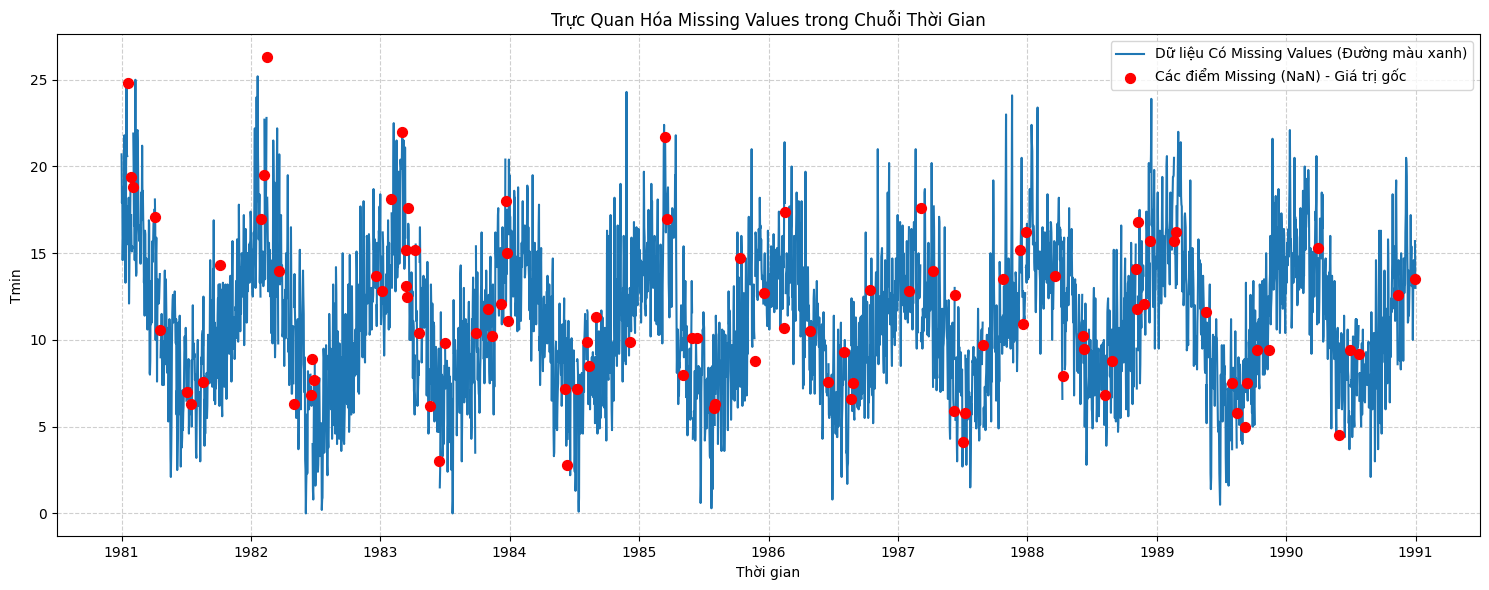

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử:
# df_series là Series gốc (không thiếu)
# df_test là Series có chứa 100 giá trị thiếu (NaN)

plt.figure(figsize=(15, 6))

# 1. Vẽ chuỗi thời gian có Missing Values (df_test)
# Khi vẽ, Matplotlib/Pandas sẽ tự động bỏ qua (skip) các giá trị NaN.
plt.plot(df_test.index, df_test.values, 
         label='Dữ liệu Có Missing Values (Đường màu xanh)', 
         color='tab:blue', 
         linestyle='-', 
         marker='',
         linewidth=1.5)

# 2. Vẽ các điểm thiếu (Missing Points)
# Lọc ra chỉ những điểm có giá trị NaN trong df_test
missing_points = df_test[df_test.isnull()]

plt.scatter(missing_points.index, 
            # Đặt giá trị y bằng giá trị gốc (df_series) để thấy giá trị thực bị mất
            df_series.loc[missing_points.index], 
            color='red', 
            label='Các điểm Missing (NaN) - Giá trị gốc',
            marker='o', 
            s=50, # Kích thước điểm
            zorder=3) # Đảm bảo điểm nằm trên đường

# 3. Định dạng và Hiển thị
plt.title('Trực Quan Hóa Missing Values trong Chuỗi Thời Gian')
plt.xlabel('Thời gian')
plt.ylabel(df_test.name) 
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [14]:
# Xử lý Missing Values bằng Interpolation
df_inter = df_test.interpolate(method='linear') # Nội suy tuyến tính
print(df_inter.loc[missing].head(10).to_markdown(numalign="left", stralign="left")) # 10 giá trị đã được điền

| Date                | Tmin   |
|:--------------------|:-------|
| 1984-08-06 00:00:00 | 10.3   |
| 1985-08-03 00:00:00 | 6      |
| 1981-08-18 00:00:00 | 10.1   |
| 1989-02-24 00:00:00 | 15.35  |
| 1987-02-02 00:00:00 | 14.6   |
| 1983-03-19 00:00:00 | 15.35  |
| 1983-02-01 00:00:00 | 15.65  |
| 1988-04-10 00:00:00 | 8.8    |
| 1983-01-07 00:00:00 | 14.15  |
| 1989-02-19 00:00:00 | 17.75  |


- Forward-fill điền giá trị bị thiếu bằng giá trị quan sát gần nhất trước đó.
- Interpolation ước lượng giá trị missing dựa trên xu hướng trước & sau.

--- Outliers bằng Rolling Z-score (Window=30) ---
Số lượng Outliers được phát hiện: 13
Danh sách 5 Outliers đầu tiên:
| Date                | Tmin   |
|:--------------------|:-------|
| 1982-01-12 00:00:00 | 22.2   |
| 1982-01-17 00:00:00 | 24     |
| 1984-10-02 00:00:00 | 16.3   |
| 1984-11-26 00:00:00 | 24.3   |
| 1986-11-05 00:00:00 | 21     |


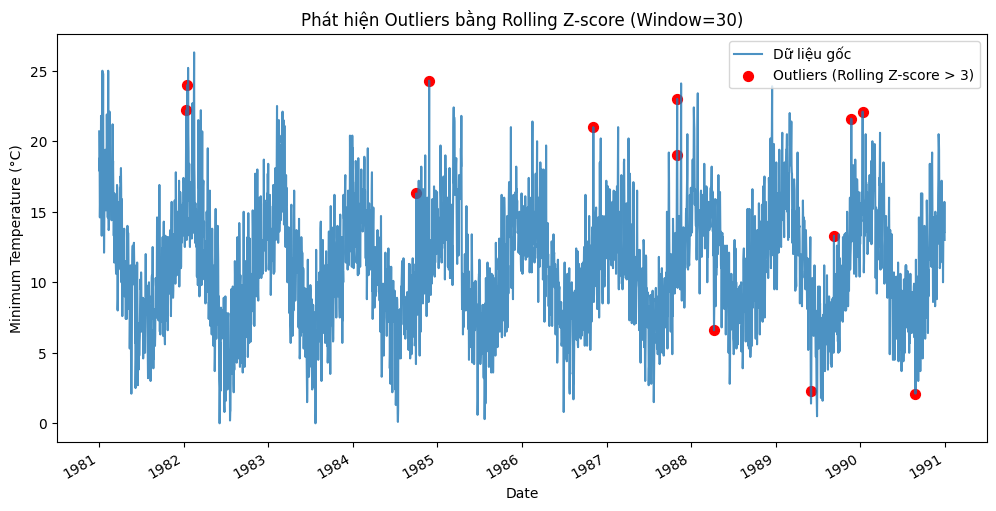

In [15]:
# Phát hiện Outliers bằng Z-score

# Xác định cửa sổ (window size)
# Cửa sổ 30 ngày là hợp lý để tính trung bình trượt theo tháng
window_size = 30
rolling_mean = df_series.rolling(window=window_size).mean()
rolling_std = df_series.rolling(window=window_size).std()

# Tính Z-Score
# Z-score = (Giá trị hiện tại - Trung bình trượt) / Độ lệch chuẩn trượt
z_score = (df_series - rolling_mean) / rolling_std

# Xác định Outliers (Ngưỡng: Z-score > 3 hoặc < -3)
# Outliers là các điểm có độ lệch lớn hơn 3 lần độ lệch chuẩn so với giá trị trung bình 30 ngày
outliers_rolling_z = df_series[np.abs(z_score) > 3]
print("--- Outliers bằng Rolling Z-score (Window=30) ---")
print(f"Số lượng Outliers được phát hiện: {len(outliers_rolling_z)}")
print("Danh sách 5 Outliers đầu tiên:")
print(outliers_rolling_z.head().to_markdown(numalign="left", stralign="left"))

#Minh họa Outliers trên biểu đồ

plt.figure(figsize=(12, 6))
df_series.plot(label='Dữ liệu gốc', alpha=0.8)

# Đánh dấu các điểm Outliers
plt.scatter(outliers_rolling_z.index, outliers_rolling_z.values, 
            color='red', marker='o', s=50, label='Outliers (Rolling Z-score > 3)')

plt.title(f'Phát hiện Outliers bằng Rolling Z-score (Window={window_size})')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.show()

### Xử lý outliers

In [16]:
# Phương pháp Thay thế bằng giá trị Trung bình Trượt (Rolling Mean Imputation)
# Đây là phương pháp thường được ưu tiên cho dữ liệu chuỗi thời gian vì nó giữ lại xu hướng cục bộ và tính mùa vụ.

# Cách làm: Thay thế giá trị ngoại lai bằng giá trị trung bình trượt (rolling_mean) của cửa sổ liền kề.
# Tạo bản sao của chuỗi gốc để xử lý
df_series_treated_mean = df_series.copy()

# Lấy các giá trị trung bình trượt
# Lưu ý: Cửa sổ tính toán phải là cửa sổ 30 ngày đã dùng để tính Z-score
rolling_mean = df_series.rolling(window=window_size).mean()

# Thay thế giá trị Outlier bằng Rolling Mean
# Sử dụng .index để lấy index của các outliers đã phát hiện
df_series_treated_mean[outliers_rolling_z.index] = rolling_mean[outliers_rolling_z.index]

# So sánh 5 giá trị bị thay thế đầu tiên
print("\n--- So sánh giá trị gốc và đã xử lý (Rolling Mean) ---")
df_comparison = pd.DataFrame({
    'Gốc': df_series.loc[outliers_rolling_z.head(5).index],
    'Xử lý (Rolling Mean)': df_series_treated_mean.loc[outliers_rolling_z.head(5).index]
})
print(df_comparison.to_markdown(numalign="left", stralign="left"))


--- So sánh giá trị gốc và đã xử lý (Rolling Mean) ---
| Date                | Gốc   | Xử lý (Rolling Mean)   |
|:--------------------|:------|:-----------------------|
| 1982-01-12 00:00:00 | 22.2  | 14.6633                |
| 1982-01-17 00:00:00 | 24    | 15.1533                |
| 1984-10-02 00:00:00 | 16.3  | 8.28333                |
| 1984-11-26 00:00:00 | 24.3  | 12.5033                |
| 1986-11-05 00:00:00 | 21    | 9.96667                |


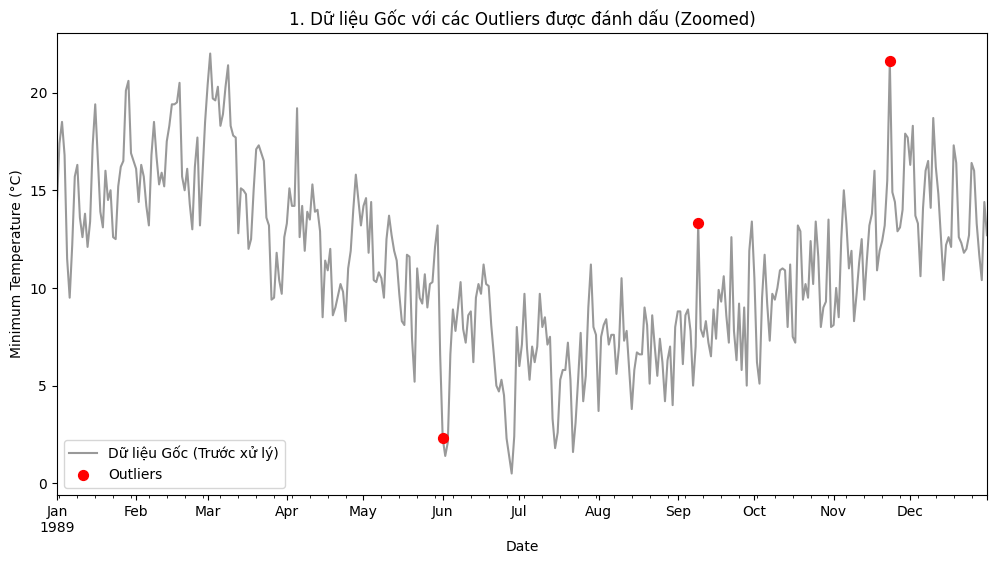

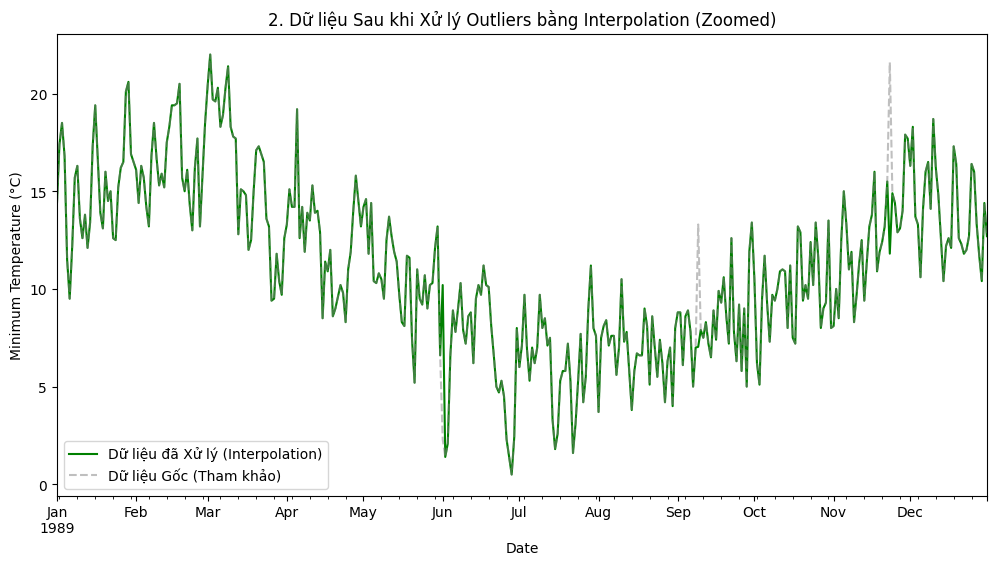

In [46]:
start = '1989-01-01'
end = '1989-12-31'


# Plot 1: Dữ liệu Gốc (TRƯỚC khi xử lý)
plt.figure(figsize=(12, 6))
# Plot the original data
df_series.loc[start:end].plot(label='Dữ liệu Gốc (Trước xử lý)', alpha=0.8, color='grey')
# Mark the outliers
plt.scatter(outliers_rolling_z.loc[start:end].index, 
            outliers_rolling_z.loc[start:end].values, 
            color='red', marker='o', s=50, zorder=5, label='Outliers')

plt.title('1. Dữ liệu Gốc với các Outliers được đánh dấu (Zoomed)')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.show()

#Plot 2: Dữ liệu đã Xử lý (SAU khi xử lý)
plt.figure(figsize=(12, 6))
# Plot the processed data
df_series_treated_mean.loc[start:end].plot(label='Dữ liệu đã Xử lý (Interpolation)', color='green', linewidth=1.5)
# Optional: Plot original data faded out for better visual comparison
df_series.loc[start:end].plot(label='Dữ liệu Gốc (Tham khảo)', color='gray', linestyle='--', alpha=0.5)

plt.title('2. Dữ liệu Sau khi Xử lý Outliers bằng Interpolation (Zoomed)')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.show()


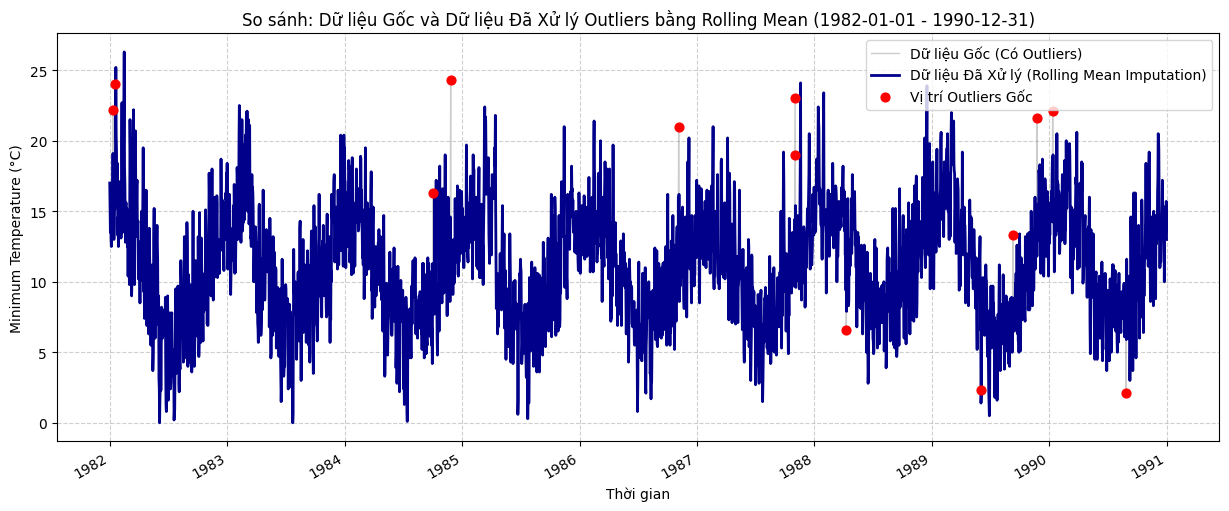


--- Hoàn tất Trực quan hóa ---
Biểu đồ đã hiển thị sự khác biệt rõ ràng giữa chuỗi gốc và chuỗi đã xử lý bằng Rolling Mean Imputation.


In [18]:

# Xác định vùng zoom (nên zoom vào một khu vực có outliers để so sánh rõ hơn)
# Tôi giữ lại vùng zoom ban đầu của bạn
zoom_start = '1982-01-01'
zoom_end = '1990-12-31'

plt.figure(figsize=(15, 6))

# 1. Vẽ Dữ liệu Gốc (màu xám nhạt)
df_series.loc[zoom_start:zoom_end].plot(
    label='Dữ liệu Gốc (Có Outliers)', 
    alpha=0.4, 
    color='gray',
    linewidth=1
)

# 2. Vẽ Dữ liệu đã Xử lý bằng Rolling Mean (màu xanh đậm)
df_series_treated_mean.loc[zoom_start:zoom_end].plot(
    label='Dữ liệu Đã Xử lý (Rolling Mean Imputation)', 
    color='darkblue', 
    linewidth=2
)

# 3. Đánh dấu các Outliers trên dữ liệu gốc (màu đỏ)
plt.scatter(
    outliers_rolling_z.loc[start:end].index, 
    outliers_rolling_z.loc[start:end].values, 
    color='red', 
    marker='o', 
    s=40, 
    zorder=5, 
    label='Vị trí Outliers Gốc'
)

plt.title(f'So sánh: Dữ liệu Gốc và Dữ liệu Đã Xử lý Outliers bằng Rolling Mean ({zoom_start} - {zoom_end})')
plt.ylabel('Minimum Temperature (°C)')
plt.xlabel('Thời gian')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- Hoàn tất Trực quan hóa ---")
print("Biểu đồ đã hiển thị sự khác biệt rõ ràng giữa chuỗi gốc và chuỗi đã xử lý bằng Rolling Mean Imputation.")

# Bài tập 5: Trực quan hóa dữ liệu chuỗi thời gian

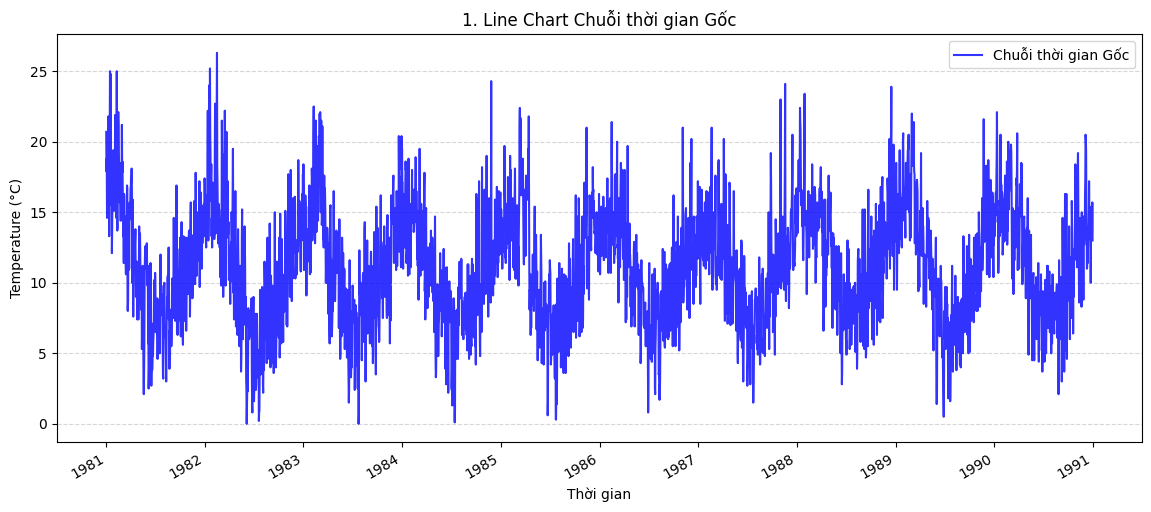

In [19]:
# 1. Line chart chuỗi thời gian gốc
plt.figure(figsize=(14, 6))

df_series.plot(label='Chuỗi thời gian Gốc', color='blue', alpha=0.8)

plt.title('1. Line Chart Chuỗi thời gian Gốc')
plt.xlabel('Thời gian')
plt.ylabel('Temperature (°C)')
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.5)

### Biểu đồ Line Chart Chuỗi Thời Gian Gốc 
- Mô tả: Biểu đồ này hiển thị nhiệt độ hằng ngày (có lẽ là ${^\circ}\text{C}$) trong khoảng 10 năm.
- Quan sát: Chuỗi thời gian có sự biến động mạnh và rõ rệt trong mỗi năm (dao động theo mùa).
- Có những đợt tăng cao (mùa hè) và giảm sâu (mùa đông) lặp lại. Về mặt xu hướng chung (trend), không có sự tăng hoặc giảm rõ ràng qua các năm. Mức nhiệt độ trung bình dường như tương đối ổn định trong suốt thập kỷ này.

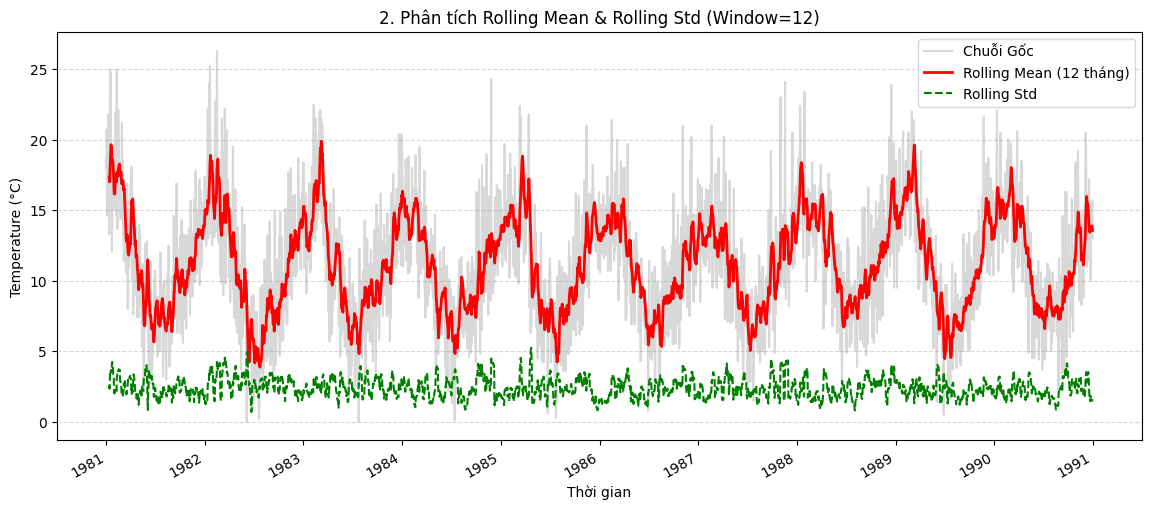

In [20]:
# Yêu cầu 2: Rolling Mean và Rolling Std (Cùng 1 ảnh)

plt.figure(figsize=(14, 6))

# Tính toán Rolling Statistics
rolling_mean = df_series.rolling(window=12).mean()
rolling_std = df_series.rolling(window=12).std()

# Vẽ chuỗi gốc (mờ) và các đường Rolling Stats
df_series.plot(label='Chuỗi Gốc', color='gray', alpha=0.3)
rolling_mean.plot(label='Rolling Mean (12 tháng)', color='red', linewidth=2)
rolling_std.plot(label='Rolling Std', color='green', linestyle='--') 

plt.title('2. Phân tích Rolling Mean & Rolling Std (Window=12)')
plt.xlabel('Thời gian')
plt.ylabel('Temperature (°C)')
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.5)

### Phân Tích Rolling Mean & Rolling Std Rolling Mean & Rolling Std (Window=12)
- Mô tả:
    - Chuỗi Gốc (Original Series): Màu xám nhạt.
    - Rolling Mean (Đường Trung bình Trượt 12 tháng): Đường màu đỏ đậm. Đường này làm phẳng sự biến động hằng ngày và theo mùa để làm nổi bật xu hướng dài hạn.
    - Rolling Std (Độ lệch Chuẩn Trượt): Đường màu xanh lá cây đứt nét. Đường này thể hiện sự biến động (độ rộng dao động) theo thời gian.
- Quan sát:
    - Rolling Mean (Đỏ): Đường này dao động theo chu kỳ rõ rệt (chu kỳ 1 năm) nhưng không có xu hướng tăng hay giảm tổng thể. Điều này củng cố nhận định chuỗi thời gian không có xu hướng tăng/giảm dài hạn đáng kể.
    - Rolling Std (Xanh lá): Đường này nằm khá ổn định xung quanh mức thấp (khoảng 2-4 ${^\circ}\text{C}$) và không có xu hướng tăng hay giảm rõ rệt theo thời gian.

In [21]:
# Vẽ seasonal plot theo tháng (đối với dữ liệu theo tháng).
# Chuẩn bị dữ liệu cho phân tích mùa vụ
df_data = pd.DataFrame(df_series)
df_data.columns = ['Value']

# Trích xuất thông tin năm, tháng, và tên thangts từ index
df_data['Year'] = df_data.index.year
df_data['Month'] = df_data.index.month
df_data['Month_Name'] = df_data.index.strftime('%b')
print("Đã tạo DataFrame df_data để phân tích mùa vụ.")

Đã tạo DataFrame df_data để phân tích mùa vụ.


C:\Users\Admin\AppData\Local\Temp\ipykernel_6224\389510972.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(month_order)


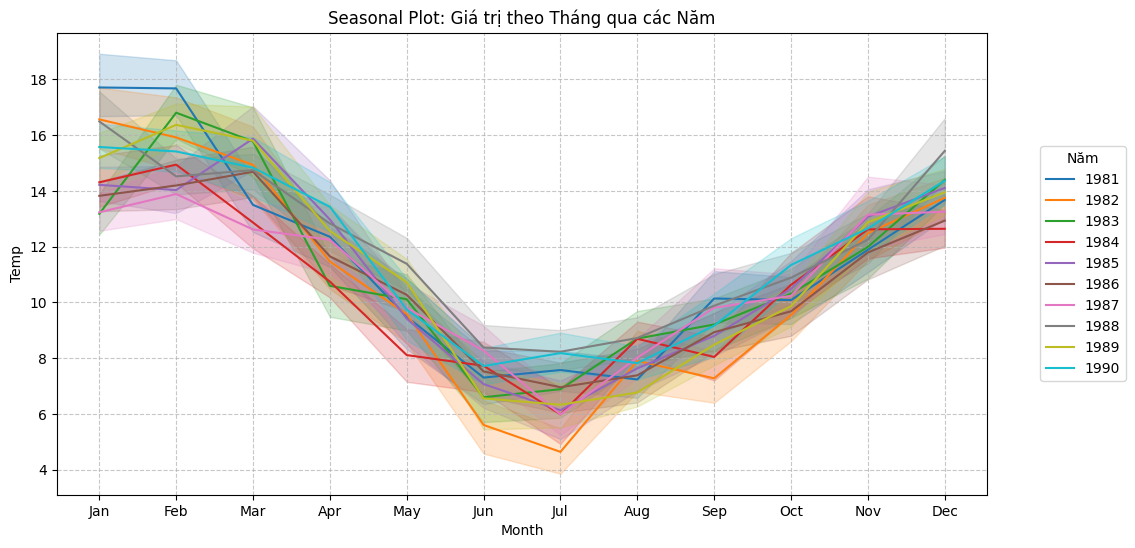

In [35]:
# 1. Thiết lập kích thước hình
plt.figure(figsize=(12, 6))

# 2. Vẽ biểu đồ Seasonal Plot bằng sns.lineplot
# Trục X: Tên tháng (Month_Name)
# Trục Y: Giá trị cần phân tích (Value)
# Phân biệt màu sắc (Hue) theo năm (Year)
sb.lineplot(
    data=df_data, 
    x='Month_Name', 
    y='Value', 
    hue='Year', 
    legend='full', 
    palette='tab10' # Chọn bảng màu
)

# 3. Thêm tiêu đề và nhãn
plt.title('Seasonal Plot: Giá trị theo Tháng qua các Năm')
plt.xlabel('Month')
plt.ylabel('Temp')

# 4. Sắp xếp lại thứ tự tháng trên trục X (đảm bảo Jan -> Dec)
# Lấy thứ tự tháng từ DataFrame ban đầu (Index)
try:
    month_order = df_data.index.strftime('%b').unique()
    plt.gca().set_xticklabels(month_order)
except AttributeError:
    # Trường hợp index không phải DateTimeIndex nữa
    # Dùng cách sắp xếp dựa trên cột Month
    month_order = df_data.sort_values('Month')['Month_Name'].unique()
    plt.gca().set_xticklabels(month_order)


# # 5. Di chuyển legend ra ngoài để không che biểu đồ
plt.legend(title='Năm', loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '1981'),
  Text(0, 1.5, '1982'),
  Text(0, 2.5, '1983'),
  Text(0, 3.5, '1984'),
  Text(0, 4.5, '1985'),
  Text(0, 5.5, '1986'),
  Text(0, 6.5, '1987'),
  Text(0, 7.5, '1988'),
  Text(0, 8.5, '1989'),
  Text(0, 9.5, '1990')])

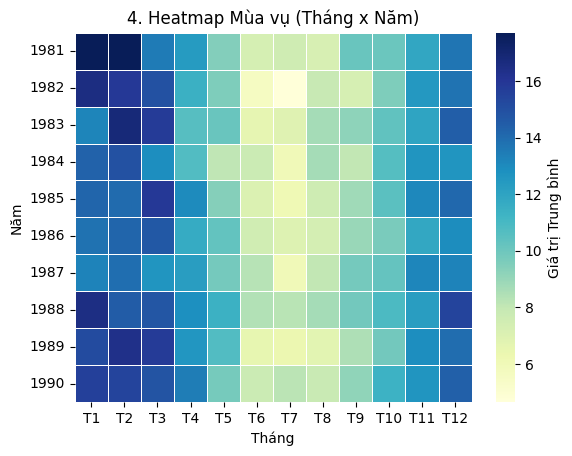

In [23]:
# Vẽ heatmap seasonality (month × year).
# Chuyển đổi dữ liệu sang dạng pivot table
df_pivot = df_data.pivot_table(
    values='Value',
    index='Year',
    columns='Month',
    aggfunc='mean'
)

# Đổi tên cột số (1-12) thành tên tháng
df_pivot.columns = [
    'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 
    'T7', 'T8', 'T9', 'T10', 'T11', 'T12'
]

sb.heatmap(
    df_pivot,
    cmap='YlGnBu', # Thay đổi cmap cho trực quan hơn
    annot=False,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Giá trị Trung bình'}
)

plt.title('4. Heatmap Mùa vụ (Tháng x Năm)')
plt.ylabel('Năm')
plt.xlabel('Tháng')
plt.yticks(rotation=0)

### Heatmap Mùa vụ (Tháng x Năm)
- Mô tả: Sử dụng màu sắc để thể hiện giá trị trung bình của nhiệt độ theo từng Tháng (T1 đến T12) và Năm (1981 đến 1990). Màu Vàng nhạt/Trắng là nhiệt độ thấp; màu Xanh đậm là nhiệt độ cao.
- Quan sát:

    - Tính Mùa vụ: Biểu đồ hiển thị các dải màu dọc rõ rệt, khẳng định tính mùa vụ mạnh:

    - Các tháng T6, T7, T8 (Giữa năm) luôn có màu vàng/trắng (lạnh nhất).

    - Các tháng T1, T2, T12 (Đầu/Cuối năm) luôn có màu xanh đậm (nóng nhất).

    - Tính Ổn định theo năm: Màu sắc trong cùng một tháng (đi ngang qua các năm) khá nhất quán, cho thấy tính mùa vụ lặp lại và ổn định qua các năm.